In [1]:
import numpy as np

def tapered_power_law(z0_in, r_in, Psi_in, r_taper_in, Phi_in):
    """
    This function computes the "tapered" power-law function.
    It takes in five parameters.
    
    Args:
        zo_in (float): input scale height [in arcsec].
        r_in (float): input list of the radii[in arcsec] we are observing.
        Psi_in (float): a unitless parameter.
        r_taper_in (float): input "tapered" radius [in arcsec].
        Phi_in (float): another unitless parameter.
        
    Returns:
        This function returns the height[in arcsec].
    """
    height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
    return height_z

In [2]:
import numpy as np

def HD163296_power_law(radius_in, flare_parameter_in, scale_height_in):
    """
    This function computes the radial height of a given gas emission surface or dust scattering surface.
    It takes in three one-dimensional input arrays. Notice that the "flare_parameter_in" and  "scale_height_in"
    parameter must have same size.
    
    Args:
        radius_in (float): input array of the radii[in arcsec] we are observing.
        flare_parameter_in (float): input array of flaring parameter.
        scale_height_in (float): input array of scale height.
        
    Returns:
        This function returns an one-dimensional array of radial heights[in arcsec].
    """
    if len(scale_height_in) == 1:
        radial_height = scale_height_in / 101 * (radius_in / (100 / 101)) ** flare_parameter_in
        return radial_height
    else:
        output1 = (radius_in / (100 / 101)) ** flare_parameter_in.reshape(len(flare_parameter_in),1)
        output1 = output1.reshape(1,len(flare_parameter_in) * len(radius_in))
        radial_height = scale_height_in.reshape(len(scale_height_in),1) / 101 * output1
        radial_height = radial_height.reshape(len(scale_height_in) * len(flare_parameter_in), len(radius_in))
        return radial_height

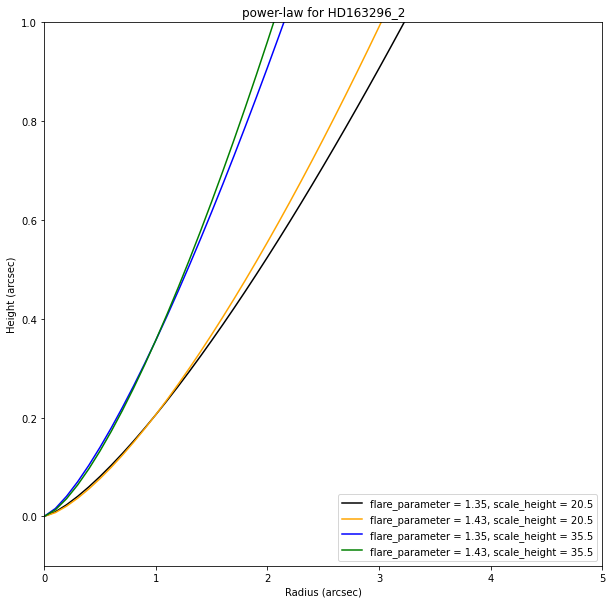

In [9]:
import matplotlib.pyplot as plt

radius_2 = np.arange(0, 5, step=0.1)

HD163296_12CO_flare_parameter2 = np.array([1.35, 1.43])
HD163296_12CO_scale_height2 = np.array([20.5, 35.5])

HD163296_12CO_height_2 = HD163296_power_law(radius_2, HD163296_12CO_flare_parameter2, HD163296_12CO_scale_height2)

plt.figure(figsize=(10, 10))
plt.plot(radius_2, HD163296_12CO_height_2[0], 'r', color='black', label='flare_parameter = 1.35, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[1], 'r', color='orange', label='flare_parameter = 1.43, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[2], 'r', color='blue', label='flare_parameter = 1.35, scale_height = 35.5')
plt.plot(radius_2, HD163296_12CO_height_2[3], 'r', color='green', label='flare_parameter = 1.43, scale_height = 35.5')
plt.legend()
plt.ylim(-0.1, 1)
plt.xlim(0, 5)
plt.xlabel(r'Radius (arcsec)')
plt.ylabel(r'Height (arcsec)')
plt.title(r'power-law for HD163296_2')
plt.show()

In [4]:
import matplotlib.pyplot as plt

def plotting_function_of_tapered_power_law(z0_in, r_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots tapered power-law function with one (or many) combination(s) of values.
    It takes in six parameters whose data type can only be float or list.
    
    Args:
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    if type(z0_in) == int:
        plt.figure(figsize=(15, 15))
        plt.plot(r_in, tapered_power_law(z0_in, r_in, Psi_in, r_taper_in, Phi_in), 'r--', color='red', label='z0 = ' + str(z0_in) + ' , ψ= ' + str(Psi_in) + ' , r_taper = ' + str(r_taper_in) + ' , φ = ' + str(Phi_in))
        plt.legend()
        plt.ylim(-0.1, 1)
        plt.xlim(0, 5)
        plt.xlabel(r'Radius (arcsec)')
        plt.ylabel(r'Height (arcsec)')
        plt.title(r'Tapered Power Law')
    elif type(z0_in) == list:
        index = 0
        plt.figure(figsize=(15, 15))
        for count_1, value_1 in enumerate(z0):
            for count_2, value_2 in enumerate(Psi):
                for count_3, value_3 in enumerate(r_taper):
                    for count_4, value_4 in enumerate(Phi):
                        plt.plot(r, tapered_power_law(value_1, r, value_2, value_3, value_4), 'r--', color=color_array[index], label='z0 = ' + str(value_1) + ' , ψ= ' + str(value_2) + ' , r_taper = ' + str(value_3) + ' , φ = ' + str(value_4))
                        index = index + 1
        plt.legend()
        plt.ylim(-0.1, 1)
        plt.xlim(0, 5)
        plt.xlabel(r'Radius (arcsec)')
        plt.ylabel(r'Height (arcsec)')
        plt.title(r'Tapered Power Law')

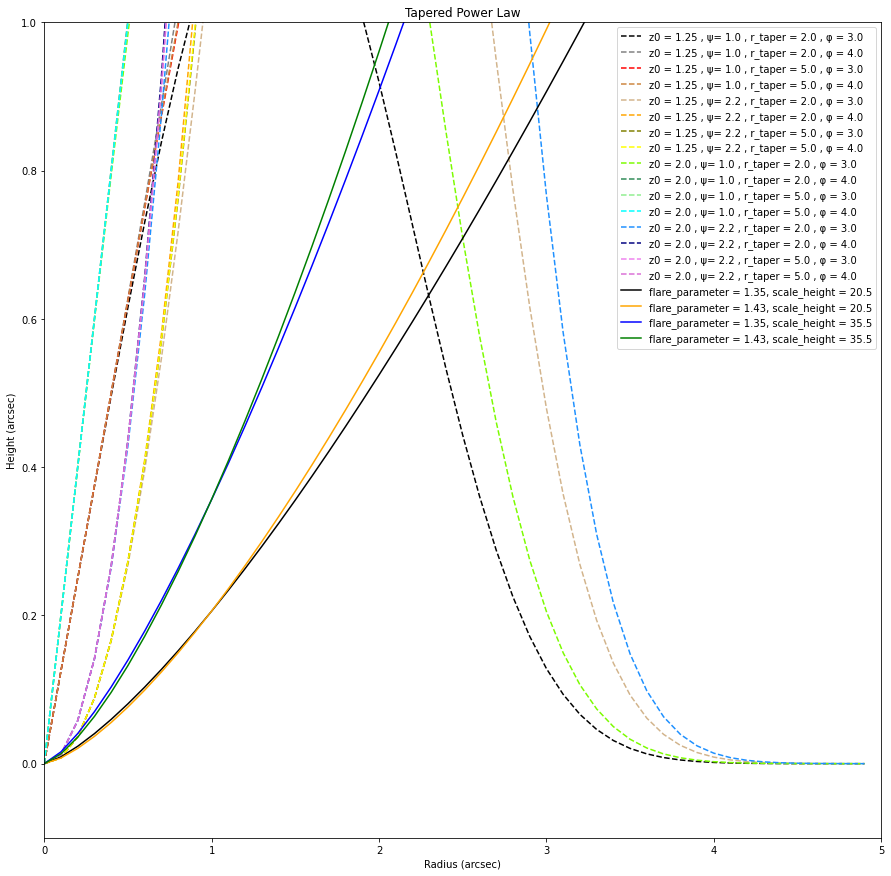

In [10]:
r = np.arange(0, 5, step=0.1)
z0 = [1.25, 2.0]
Psi =  [1.0, 2.2]
r_taper = [2.0, 5.0]
Phi = [3.0, 4.0]
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']

plotting_function_of_tapered_power_law(z0, r, Psi, r_taper, Phi, color_array)

plt.plot(radius_2, HD163296_12CO_height_2[0], 'r', color='black', label='flare_parameter = 1.35, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[1], 'r', color='orange', label='flare_parameter = 1.43, scale_height = 20.5')
plt.plot(radius_2, HD163296_12CO_height_2[2], 'r', color='blue', label='flare_parameter = 1.35, scale_height = 35.5')
plt.plot(radius_2, HD163296_12CO_height_2[3], 'r', color='green', label='flare_parameter = 1.43, scale_height = 35.5')
plt.legend()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

def best_fit_curve_and_datapoints(path_in, z0_in, r_in, Psi_in, r_taper_in, Phi_in, color_array_in):
    """
    This function plots best fit curves over datapoints.
    It takes in seven parameters.
    
    Args:
        path_in (str): name[no units] of directory holding the real ALMA observational images.
        zo_in (float/list): input scale height [in arcsec].
        r_in (float/list): input list of the radii[in arcsec] we are observing.
        Psi_in (float/list): a unitless parameter.
        r_taper_in (float/list): input "tapered" radius [in arcsec].
        Phi_in (float/list): another unitless parameter.
        color_array_in (list): input list of colors.
        
    Returns:
        This function returns nothing.
    """
    HD163296_molecule = disk_observation(path_in)
    r, z, Fnu, velocity, x, yf, yn = HD163296_molecule.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu = 0.0025)
    fig = plt.figure(figsize=(70, 80))
    for index, velo in enumerate(np.unique(velocity)):
        if round(velo / 1000., 2) >= 6.26 and round(velo / 1000., 2) <= 7.86:
            rvals_tofit = r[np.where(velocity==velo)]
            zvals_tofit = z[np.where(velocity==velo)]
            i = 0
            ax = plt.subplot(7, 8, index+1)
            ax.scatter(r[np.where(velocity==velo)], z[np.where(velocity==velo)],s=2)
            ax.set_xlabel('r (arcsec)')
            ax.set_ylabel('z (arcsec)')
            ax.set_xlim(left = 0, right=5)
            ax.text(0.75, 0.9, "%.2f km/s" % (velo/1000.), transform=ax.transAxes)
            for count_1, value_1 in enumerate(z0):
                for count_2, value_2 in enumerate(Psi):
                    for count_3, value_3 in enumerate(r_taper):
                        for count_4, value_4 in enumerate(Phi):
                            popt, cov = HD163296_HCN.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([value_1, value_2, value_3, value_4])})
                            ax.plot(r_in, tapered_power_law(popt[0], r_in, popt[1], popt[2], popt[3]), 'r--', color=color_array_in[i], label='z0 = ' + str(popt[0]) + ' , ψ= ' + str(popt[1]) + ' , r_taper = ' + str(popt[2]) + ' , φ = ' + str(popt[3]))
                            i = i + 1
    plt.show()

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in

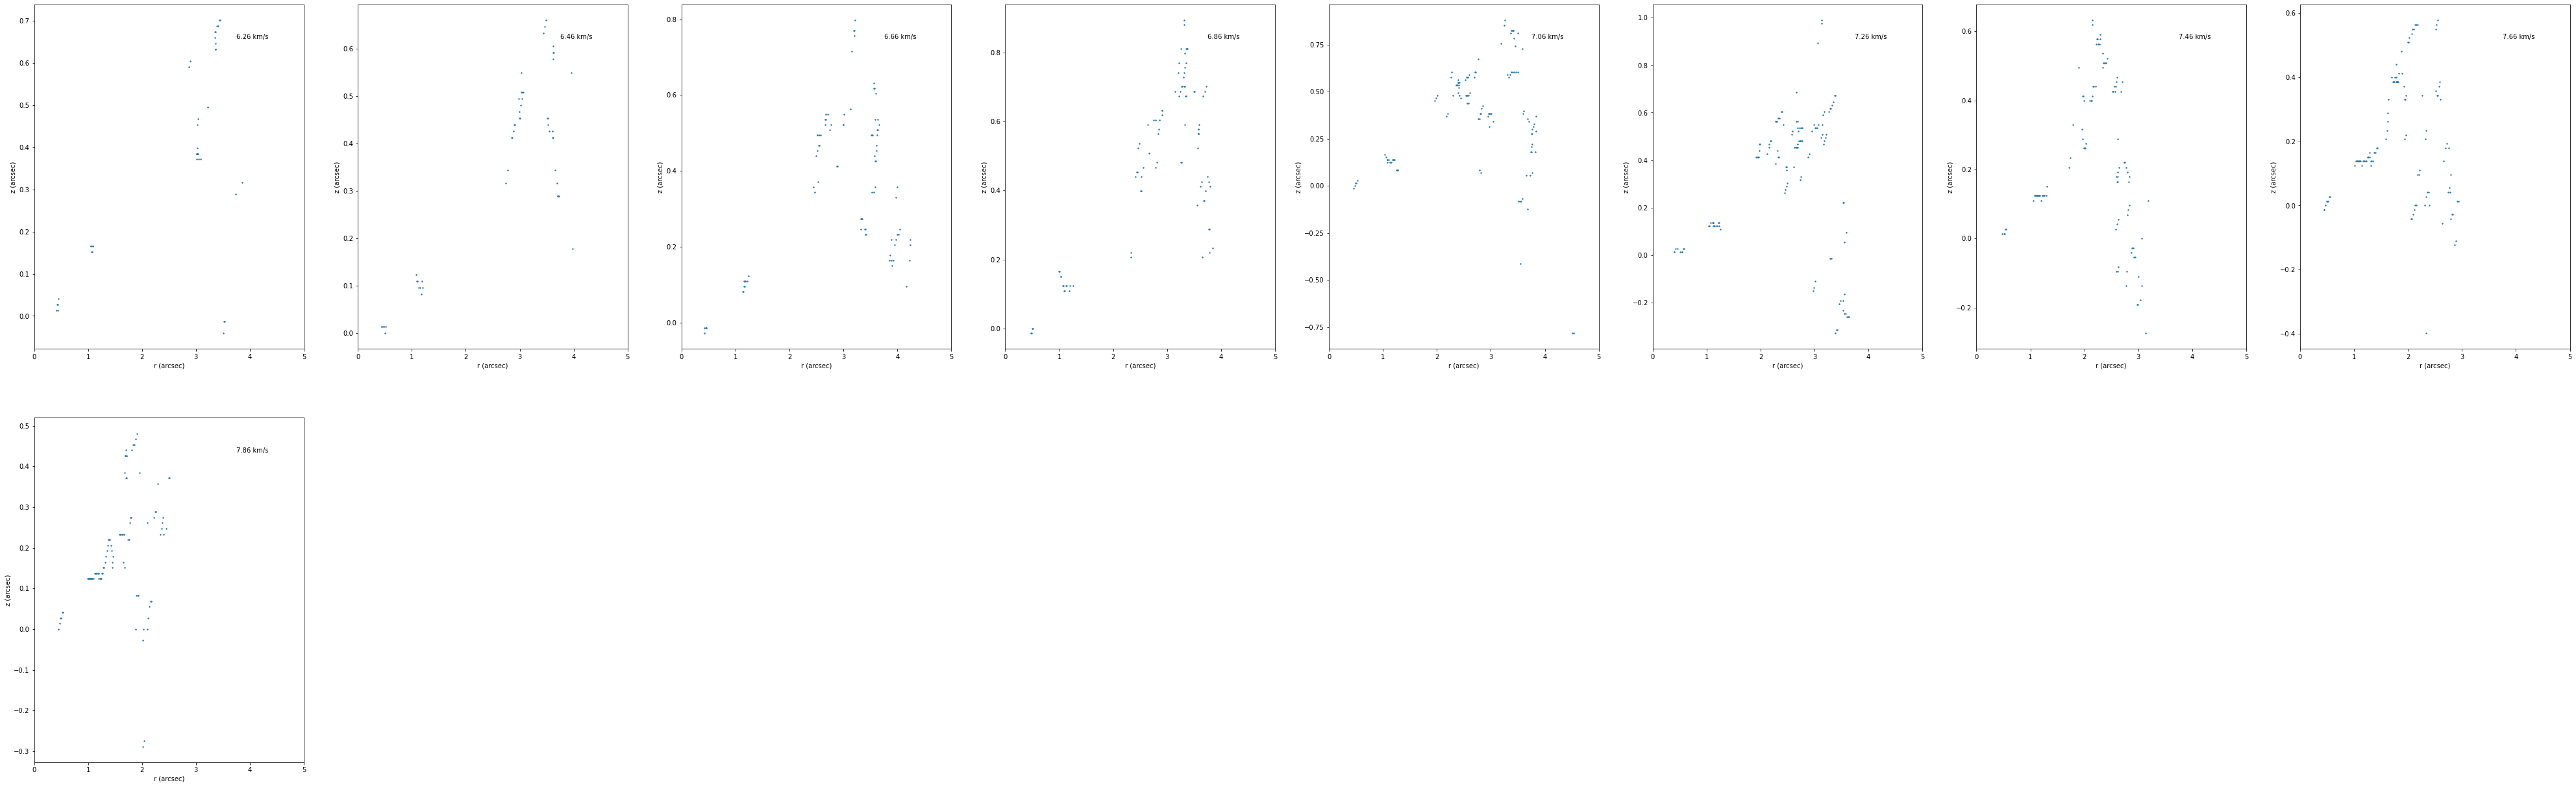

In [37]:
color_array = ['black', 'grey', 'red', 'peru', 'tan', 'orange', 'olive', 'yellow', 'lawngreen', 'seagreen', 'lightgreen', 'cyan', 'dodgerblue', 'navy', 'violet', 'orchid']
z0 = np.array([0.2, 0.5])
Psi =  np.array([1.0, 1.5])
r_taper = np.array([4.0, 4.5])
Phi = np.array([4.0, 5.0])
path = '/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits'
r = np.arange(0, 5, step=0.1)
best_fit_curve_and_datapoints(path, z0, r, Psi, r_taper, Phi, color_array)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from diskprojection import disk_observation

HD163296_HCN = disk_observation('/data/shared/HD163296_MAPS/HD_163296_HCN_260GHz_hf1.robust_0.5.clean.JvMcorr.image.pbcor.fits')
#note that chans does NOT correspond to the channel maps
r, z, Fnu, velocity, x, yf, yn = HD163296_HCN.get_emission_surface_v2(inc=46.7, PA=313.3, chans = [28, 98], r_max = 5, min_Fnu=.0025)

Using -1.34 km/s to 12.66 km/s, and 0.00" to 5.00".
Rotating data cube...
Detecting peaks...


In [57]:
rvals_tofit = r[np.where(velocity==HD163296_HCN.velax[69])]
zvals_tofit = z[np.where(velocity==HD163296_HCN.velax[69])]

popt, cov = HD163296_HCN.fit_emission_surface(rvals_tofit, zvals_tofit, curve_fit_kwargs = {'p0': np.array([0.2, 1.0, 4.0, 5.0])})
print(popt)

[ 0.07425394  1.99640027  3.74591235 15.97498396]


In [58]:
r = np.arange(0, 5, step=0.1)
print(tapered_power_law(0.07425394, r, 1.99640027, 3.74591235, 15.97498396))

[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


<ipython-input-1-14fe93deaf7f>:18: RuntimeWarning: invalid value encountered in power
  height_z = z0_in * ((r_in) ** Psi_in) * np.exp((-(r_in / r_taper_in)) ** Phi_in)
